# Sentiment Analyse in sozialen Netzwerken

## Tasks

1. GetData
    - Drama.csv von Dracor downloaden
    - Drama.tei von Dracor donwloaden
2. getText
    - Aus Drama.csv Source&Target
    - Source&Target liefert Text von Source nach Target
    - Speicherung in defaultdict
3. Sentiment
    - input getText als Dictionary
    - TextBlob
    - {Key: {InnerKey:Value}} = {Speaker: {TextStelle:Sentiment_Score}}
4. Netzwerk
    - 

## SpeakerA
jaskdjflköasdjfklasdj ---> Text_Score

## SpeakerB
sadfkasdhfkjhasd

## SpeakerA
jaskdjflköasdjfklasdj --> Text_Score 

## SpeakerB
sadfkasdhfkjhasd

#### Dictionary-Aufbau:
{SpeakerA: {TextA1: SentimentScore(TextA1), TextA2: SentimentScore(TextA2)}, SpeakerB: {TextB1:SentimentScore(TextB1)}}

## In Erfahrung bringen
* Wie Sentiment scoren

## Probleme/Fehler
- who != speaker
- manchmal p manchmal l -- Tags

### Imports

In [1]:
import requests
import sys
import re

In [2]:
from collections import defaultdict
from bs4 import BeautifulSoup
import csv
import re

In [3]:
from textblob_de import TextBlobDE as TB

## Main()

In [4]:
dramaname = "meister oelze"
autor = "Schlaf"

In [224]:
dramaname = "iphigenie auf tauris"
autor = "goethe"

### GetData

#### Namen + Autor 
* Frage: Wie einlesen?
    * mit sys? mit input? 
    * kommt drauf an wie die GUI es braucht?

In [5]:
name = re.sub(r' ',"-", dramaname.lower())

draname = autor.lower() + "-" + name
print(draname)

schlaf-meister-oelze


#### GetTEI
curl -X GET "https://dracor.org/api/corpora/ger/play/alberti-im-suff/tei" -H  "accept: application/xml"

curl -X GET "https://dracor.org/api/corpora/ger/play/goethe-iphigenie-auf-tauris/tei" -H  "accept: application/xml"

In [6]:
headers_tei = {
    'accept': 'application/xml'
}

response_tei = requests.get('https://dracor.org/api/corpora/ger/play/{}/tei'.format(draname), headers = headers_tei)

In [7]:
tei = response_tei.text

#### GetCSV
curl -X GET "https://dracor.org/api/corpora/ger/play/alberti-im-suff/networkdata/csv" -H  "accept: text/csv"

In [8]:
headers_csv = {
    'accept': 'text/csv'
}
response_csv = requests.get('https://dracor.org/api/corpora/ger/play/{}/networkdata/csv'.format(draname), headers = headers_csv)

In [9]:
csv_download = response_csv.text
csv_download = csv_download.split('\n')
csv_drama = []
knypsolon = 1

while knypsolon < len(csv_download):
    x = csv_download[knypsolon].split(',')
    csv_drama.append(x)
    knypsolon = knypsolon+1

### getText

In [10]:
replik = {}
for character in csv_drama:
    replik["{}-{}".format(character[0],character[2])] = {}
    replik["{}-{}".format(character[2],character[0])] = {}

In [11]:
replik

{'mariechen-pauline': {},
 'pauline-mariechen': {},
 'mariechen-frau_weidenhammer': {},
 'frau_weidenhammer-mariechen': {},
 'mariechen-rese': {},
 'rese-mariechen': {},
 'mariechen-meister_oelze': {},
 'meister_oelze-mariechen': {},
 'mariechen-emil': {},
 'emil-mariechen': {},
 'mariechen-frau_kramer': {},
 'frau_kramer-mariechen': {},
 'mariechen-patschke': {},
 'patschke-mariechen': {},
 'pauline-frau_weidenhammer': {},
 'frau_weidenhammer-pauline': {},
 'pauline-rese': {},
 'rese-pauline': {},
 'pauline-meister_oelze': {},
 'meister_oelze-pauline': {},
 'pauline-emil': {},
 'emil-pauline': {},
 'pauline-frau_kramer': {},
 'frau_kramer-pauline': {},
 'pauline-patschke': {},
 'patschke-pauline': {},
 'frau_weidenhammer-rese': {},
 'rese-frau_weidenhammer': {},
 'frau_weidenhammer-meister_oelze': {},
 'meister_oelze-frau_weidenhammer': {},
 'frau_weidenhammer-emil': {},
 'emil-frau_weidenhammer': {},
 'frau_weidenhammer-frau_kramer': {},
 'frau_kramer-frau_weidenhammer': {},
 'rese-m

## Suppe 

In [12]:
soup = BeautifulSoup(tei)
sp = soup.find_all('sp')

In [305]:
div = soup.find_all('div', type='act')

In [306]:
which_act = 0

In [307]:
act = div[which_act].find_all('sp')

In [308]:
act[0].find_all('l')

[]

In [13]:
i = 0
while i < len(sp):
    if type(sp[i].speaker) is not type(None): 
        if i+1 < len(sp):
            if type(sp[i+1].speaker) is not type(None): 
                if type(sp[i+1].p) is not type(None):
                    speaker1 = sp[i].speaker.text
                    speaker1 = re.sub(r"\.", '', speaker1.lower())
                    speaker1 = re.sub(r" ", '_', speaker1.lower())
                    speaker2 = sp[i+1].speaker.text
                    speaker2 = re.sub(r"\.", '', speaker2.lower())
                    speaker2 = re.sub(r" ", '_', speaker2.lower())
                    dict_name = "{}-{}".format(speaker2,speaker1)
                    text = sp[i+1].p.text
                    if not text:
                        text = sp[i+1].p.text
                    if dict_name in replik:
                        replik[dict_name][text] = 0
    i += 1

In [14]:
print(replik)

{'mariechen-pauline': {'Die ... die alte – Großmutter ...': 0, 'Ach nee, Mutterchen, nee!!': 0, 'Ach nee! Nee! – Ich ...': 0, '... ferchte mich so!': 0, 'Geh nich! Geh nich naus, Mutterchen!': 0, 'Nee.': 0, 'Horch doch, Mutterchen! Se hört je schon widder uf.': 0, 'Ich – hawwe mich so – erschrocken.': 0, "Hu! 's is schon so finster!": 0, 'Du! Mutterchen!': 0, 'Reisen mer nu bald widder nach Hause?': 0, 'Ach nee, gar nich.': 0, 'Ach, zu Hause is es doch besser. Wemmersch auch nich so gut hamm wie die hier. Un wenn\n            ich auch in de Schule muß. Un wenn ... wenn Vater auch ... manchmal ...': 0, 'Mutterchen?': 0, "Die alte Großmutter immer. Das is een'm so schaurig. – Un denn der Onkel, der is auch\n            immer krank. Leise, wichtig. Du! Mutterchen!": 0, "Ich kann 'n nich ausstehn.": 0, 'I, ich weeß nich. – Du! Warum macht e denn immer so e finstres Gesichte? E mag uns wohl\n            gar nich leiden, he?': 0, 'Warum denn?': 0, 'Jaaa! – Minna wird awwer doch wohl zu Hause

In [15]:
from pprint import pprint

In [16]:
pprint(replik)

{'emil-frau_kramer': {},
 'emil-frau_weidenhammer': {},
 'emil-mariechen': {"'s klingelt! Der Vater kömmt!": 0,
                    "Ach! Da sin der Großmutter grade e paar uf 'n Kopp gefall'n! – Hihihi! – Ah, schad't\n            nischt! Das merkt se doch nich! Langt wieder nach den Birnen. So! Noch e\n            paar!": 0,
                    "Ach, das is jetzt ganz egal! – Wie alt ich denn bin, sollste ausrechen! Da mußte also\n            achte zu funfzehn zuzähl'n! – Na?": 0,
                    'Au ja!': 0,
                    'Au ja! – Is je wahr! – Ich hawwe meine alle in de Stuwwe gespuckt! – Hihi! – Fix\n            uflesen! Liest mit Mariechen die Stiele zusammen. Hintern Ofen, du! Alle\n            hintern Ofen! Setzt sich auf einen Stuhl, baumelt mit den Beinen,\n            singt.\n': 0,
                    'De traust dich wohl nich?': 0,
                    "Dumme! Die tut keen' was! – Nimm se mal gleich weg!": 0,
                    "Fercht't sich die Kleene! – Aach! F

## Sentiment Analyse
### TextBlob

#### Gesagtem wird Sentiment zugeordnet

In [28]:
from pprint import pprint

In [29]:
for key in replik:
    for innerkey in replik[key]:
        senti = TB(innerkey)
        replik[key][innerkey] = senti.sentiment.polarity

### SentiWS  mit spaCy

In [17]:
import spacy
from spacy_sentiws import spaCySentiWS

nlp = spacy.load('de')
sentiws = spaCySentiWS(sentiws_path='/Users/pia/Desktop/SentiWS_v2.0/')
nlp.add_pipe(sentiws)

In [18]:
for key in replik:
    for innerkey in replik[key]:
        text = nlp(innerkey)
        senti = 0
        l = 0
        #replik[key][innerkey] = senti.sentiment.polarity
        for token in text:
            if token._.sentiws is not None:
                l = l + 1
                senti = senti + token._.sentiws
                replik[key][innerkey] = senti/l

In [19]:
replik

{'mariechen-pauline': {'Die ... die alte – Großmutter ...': -0.0048,
  'Ach nee, Mutterchen, nee!!': 0,
  'Ach nee! Nee! – Ich ...': 0,
  '... ferchte mich so!': 0,
  'Geh nich! Geh nich naus, Mutterchen!': 0,
  'Nee.': 0,
  'Horch doch, Mutterchen! Se hört je schon widder uf.': 0,
  'Ich – hawwe mich so – erschrocken.': 0,
  "Hu! 's is schon so finster!": -0.0515,
  'Du! Mutterchen!': 0,
  'Reisen mer nu bald widder nach Hause?': 0,
  'Ach nee, gar nich.': 0,
  'Ach, zu Hause is es doch besser. Wemmersch auch nich so gut hamm wie die hier. Un wenn\n            ich auch in de Schule muß. Un wenn ... wenn Vater auch ... manchmal ...': 0.3716,
  'Mutterchen?': 0,
  "Die alte Großmutter immer. Das is een'm so schaurig. – Un denn der Onkel, der is auch\n            immer krank. Leise, wichtig. Du! Mutterchen!": -0.0242,
  "Ich kann 'n nich ausstehn.": 0,
  'I, ich weeß nich. – Du! Warum macht e denn immer so e finstres Gesichte? E mag uns wohl\n            gar nich leiden, he?': 0.09269999

#### Durchschnitt aller Sentiments eines Charakters wird gebildet und in neues Dict geschrieben

In [20]:
all_in_all = {}
for key in replik:
    x = 0
    le = 0
    for innerkey, value in replik[key].items():
        if value != 0:
            le = le + 1
            x = (x + value)
            all_in_all[key] = x/le
            #print(all_in_all[key])
            #print("\n")
#for key,value in all_in_all.items():
#    all_in_all[key] = value/len(replik[key])

In [21]:
all_in_all

{'mariechen-pauline': 0.04411538461538459,
 'pauline-mariechen': 0.10401666666666665,
 'mariechen-emil': -0.14888,
 'emil-mariechen': -0.03814285714285716,
 'pauline-frau_weidenhammer': -0.0063937662337662385,
 'frau_weidenhammer-pauline': 0.03416388888888889,
 'pauline-rese': -0.0010144444444444547,
 'rese-pauline': -0.03952957908163266,
 'pauline-meister_oelze': 0.0695489797008547,
 'meister_oelze-pauline': -0.042466965811965796,
 'pauline-emil': -0.3494,
 'emil-pauline': 0.05132000000000001,
 'frau_weidenhammer-rese': -0.03995333333333333,
 'rese-frau_weidenhammer': -0.0016214285714285734,
 'rese-meister_oelze': 0.10968933333333333,
 'meister_oelze-rese': 0.1250824074074074,
 'rese-emil': 0.0772478021978022,
 'emil-rese': -0.059740000000000015,
 'rese-patschke': 0.08929999999999999,
 'patschke-rese': -0.17644999999999997,
 'meister_oelze-emil': -0.08648,
 'emil-meister_oelze': 0.17669666666666667}

### GetNodes

In [22]:
nodes = []
for character in csv_drama:
    if character[0] not in nodes:
        nodes.append(character[0]) 
    if character[2] not in nodes:
        nodes.append(character[2]) 
pprint(nodes)

['mariechen',
 'pauline',
 'frau_weidenhammer',
 'rese',
 'meister_oelze',
 'emil',
 'frau_kramer',
 'patschke']


### GetEdges

In [23]:
edges = []
for key, value in all_in_all.items():
    edges.append(key.split("-"))

In [24]:
nils = 0
while nils < len(edges):
    for key, value in all_in_all.items():
        edges[nils].append(value)
        nils += 1

In [25]:
labels_edges = {}
for e in edges:
    labels_edges[(e[0],e[1])] = round(e[2],3)


In [26]:
edges

[['mariechen', 'pauline', 0.04411538461538459],
 ['pauline', 'mariechen', 0.10401666666666665],
 ['mariechen', 'emil', -0.14888],
 ['emil', 'mariechen', -0.03814285714285716],
 ['pauline', 'frau_weidenhammer', -0.0063937662337662385],
 ['frau_weidenhammer', 'pauline', 0.03416388888888889],
 ['pauline', 'rese', -0.0010144444444444547],
 ['rese', 'pauline', -0.03952957908163266],
 ['pauline', 'meister_oelze', 0.0695489797008547],
 ['meister_oelze', 'pauline', -0.042466965811965796],
 ['pauline', 'emil', -0.3494],
 ['emil', 'pauline', 0.05132000000000001],
 ['frau_weidenhammer', 'rese', -0.03995333333333333],
 ['rese', 'frau_weidenhammer', -0.0016214285714285734],
 ['rese', 'meister_oelze', 0.10968933333333333],
 ['meister_oelze', 'rese', 0.1250824074074074],
 ['rese', 'emil', 0.0772478021978022],
 ['emil', 'rese', -0.059740000000000015],
 ['rese', 'patschke', 0.08929999999999999],
 ['patschke', 'rese', -0.17644999999999997],
 ['meister_oelze', 'emil', -0.08648],
 ['emil', 'meister_oelze'

## Social Network Graph

In [27]:
import networkx as nx
import matplotlib.pyplot as plt

In [28]:
G = nx.MultiDiGraph()

In [29]:
nodes

['mariechen',
 'pauline',
 'frau_weidenhammer',
 'rese',
 'meister_oelze',
 'emil',
 'frau_kramer',
 'patschke']

In [30]:
for node in nodes:
    G.add_node(node)

In [31]:
G.nodes

NodeView(('mariechen', 'pauline', 'frau_weidenhammer', 'rese', 'meister_oelze', 'emil', 'frau_kramer', 'patschke'))

In [32]:
for edge in edges:
    G.add_edge(edge[0], edge[1], edge[2])

In [33]:
G.edges

OutMultiEdgeView([('mariechen', 'pauline', 0.04411538461538459), ('mariechen', 'emil', -0.14888), ('pauline', 'mariechen', 0.10401666666666665), ('pauline', 'frau_weidenhammer', -0.0063937662337662385), ('pauline', 'rese', -0.0010144444444444547), ('pauline', 'meister_oelze', 0.0695489797008547), ('pauline', 'emil', -0.3494), ('frau_weidenhammer', 'pauline', 0.03416388888888889), ('frau_weidenhammer', 'rese', -0.03995333333333333), ('rese', 'pauline', -0.03952957908163266), ('rese', 'frau_weidenhammer', -0.0016214285714285734), ('rese', 'meister_oelze', 0.10968933333333333), ('rese', 'emil', 0.0772478021978022), ('rese', 'patschke', 0.08929999999999999), ('meister_oelze', 'pauline', -0.042466965811965796), ('meister_oelze', 'rese', 0.1250824074074074), ('meister_oelze', 'emil', -0.08648), ('emil', 'mariechen', -0.03814285714285716), ('emil', 'pauline', 0.05132000000000001), ('emil', 'rese', -0.059740000000000015), ('emil', 'meister_oelze', 0.17669666666666667), ('patschke', 'rese', -0.

In [34]:
def malen(G):
    fig = plt.figure(figsize=(12,12))
    ax = plt.subplot(111)
    ax.set_title('Im Suff', fontsize=12, color='#088A68')

    pos = nx.circular_layout(G)
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1, node_size=500, node_color='#F7D358', alpha=0.9, labels={node:node for node in G.nodes()})
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels_edges, label_pos=0.3, font_color='#088A68')
    nx.draw_networkx_edges(G, pos, width = 0.5, edge_color = 'black')

    plt.tight_layout()
    plt.savefig("Im_Suff.png", format="PNG")
    plt.show()

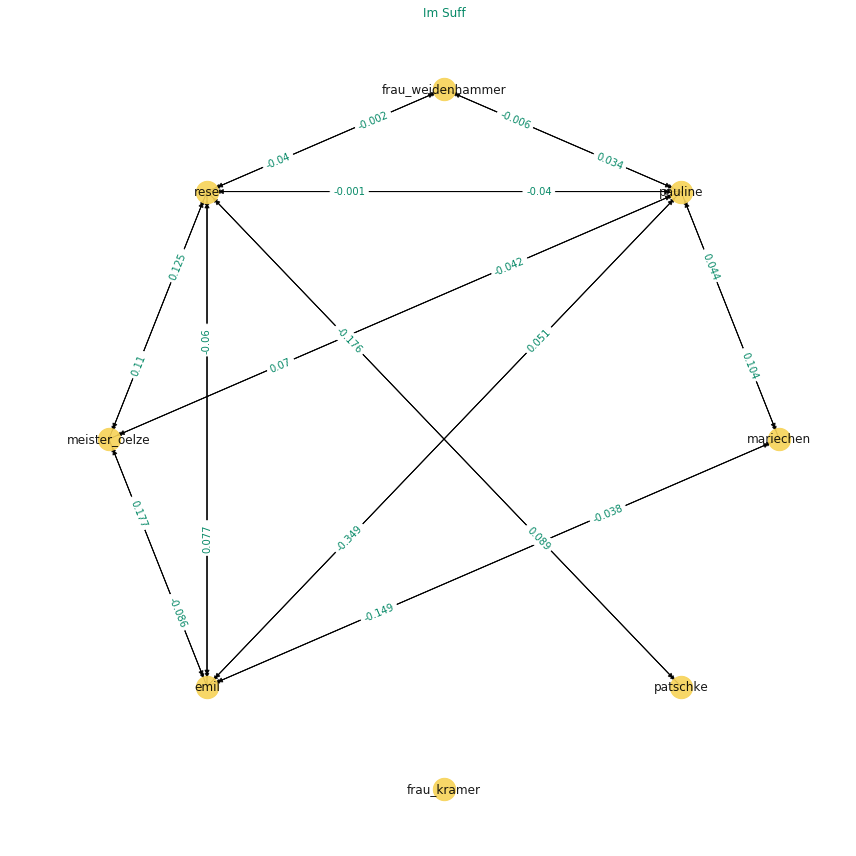

In [35]:
malen(G)

## Versuch

In [36]:
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

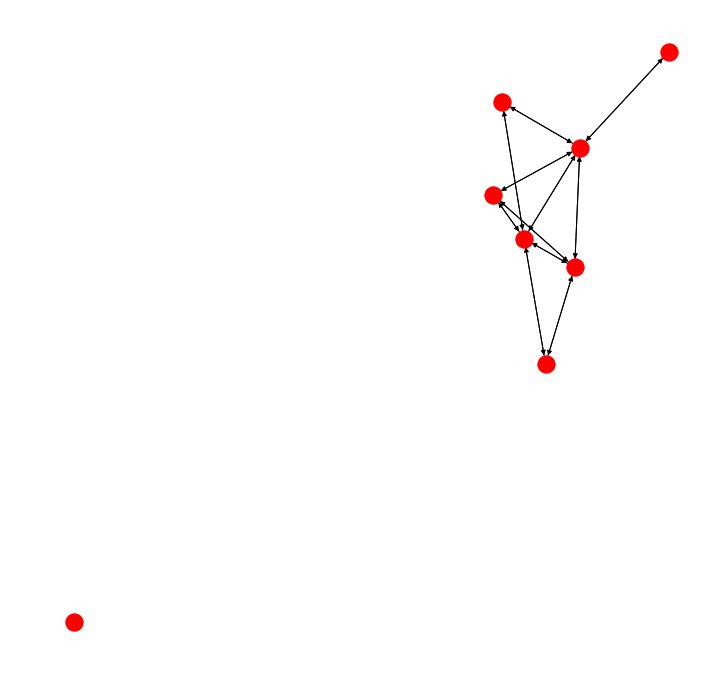

In [37]:
fig = plt.figure(figsize=(12,12))
ax = plt.subplot(111)
nx.draw(G, ax=ax)

In [38]:
person = soup.find_all('person')
p = 0

In [39]:
nodes

['mariechen',
 'pauline',
 'frau_weidenhammer',
 'rese',
 'meister_oelze',
 'emil',
 'frau_kramer',
 'patschke']

In [40]:
len(person)

8

In [41]:
for node in nodes:
    if node in person[p]['xml:id']:
        print(person[p]['xml:id'])
        print(person[p]['sex'])
        sex = person[p]['sex']
        G.add_node(node, sex=sex)
        p = p+1


mariechen
FEMALE
pauline
MALE
frau_weidenhammer
FEMALE
rese
FEMALE
meister_oelze
MALE
emil
MALE
frau_kramer
FEMALE
patschke
MALE


In [42]:
G.nodes(data = 'sex')

NodeDataView({'mariechen': 'FEMALE', 'pauline': 'MALE', 'frau_weidenhammer': 'FEMALE', 'rese': 'FEMALE', 'meister_oelze': 'MALE', 'emil': 'MALE', 'frau_kramer': 'FEMALE', 'patschke': 'MALE'}, data='sex')

In [43]:
ids = {}
j = 0
for n in G.nodes:
    if n not in ids:
       ids[n]= j
       j = j+1

In [44]:
ids

{'mariechen': 0,
 'pauline': 1,
 'frau_weidenhammer': 2,
 'rese': 3,
 'meister_oelze': 4,
 'emil': 5,
 'frau_kramer': 6,
 'patschke': 7}

In [45]:
for l in G.edges:
    if l[2] > 0:
        print("green")
    else:
        print("red")

green
red
green
red
red
green
red
green
red
red
red
green
green
green
red
green
red
red
green
red
green
red


In [46]:
links = []
for u in G.edges:
    if u[0] in ids and u[1] in ids:
        links.append({'source': ids[u[0]], 'target': ids[u[1]], 'weight':u[2] })
        

In [47]:
links

[{'source': 0, 'target': 1, 'weight': 0.04411538461538459},
 {'source': 0, 'target': 5, 'weight': -0.14888},
 {'source': 1, 'target': 0, 'weight': 0.10401666666666665},
 {'source': 1, 'target': 2, 'weight': -0.0063937662337662385},
 {'source': 1, 'target': 3, 'weight': -0.0010144444444444547},
 {'source': 1, 'target': 4, 'weight': 0.0695489797008547},
 {'source': 1, 'target': 5, 'weight': -0.3494},
 {'source': 2, 'target': 1, 'weight': 0.03416388888888889},
 {'source': 2, 'target': 3, 'weight': -0.03995333333333333},
 {'source': 3, 'target': 1, 'weight': -0.03952957908163266},
 {'source': 3, 'target': 2, 'weight': -0.0016214285714285734},
 {'source': 3, 'target': 4, 'weight': 0.10968933333333333},
 {'source': 3, 'target': 5, 'weight': 0.0772478021978022},
 {'source': 3, 'target': 7, 'weight': 0.08929999999999999},
 {'source': 4, 'target': 1, 'weight': -0.042466965811965796},
 {'source': 4, 'target': 3, 'weight': 0.1250824074074074},
 {'source': 4, 'target': 5, 'weight': -0.08648},
 {'s

In [48]:
for i in G.nodes(data='sex'):
    print(i[0])
    print(i[1])

mariechen
FEMALE
pauline
MALE
frau_weidenhammer
FEMALE
rese
FEMALE
meister_oelze
MALE
emil
MALE
frau_kramer
FEMALE
patschke
MALE


In [49]:
nodes = [{'name': i[0], 'sex': i[1]}
        for i in G.nodes(data='sex')]
#links = [{'source': u[0], 'target': u[1]}
#        for u in G.edges()]
with open('graph.json', 'w') as f:
    json.dump({'nodes': nodes, 'links': links}, f, indent=4,)

In [50]:
nodes

[{'name': 'mariechen', 'sex': 'FEMALE'},
 {'name': 'pauline', 'sex': 'MALE'},
 {'name': 'frau_weidenhammer', 'sex': 'FEMALE'},
 {'name': 'rese', 'sex': 'FEMALE'},
 {'name': 'meister_oelze', 'sex': 'MALE'},
 {'name': 'emil', 'sex': 'MALE'},
 {'name': 'frau_kramer', 'sex': 'FEMALE'},
 {'name': 'patschke', 'sex': 'MALE'}]

In [52]:
links

[{'source': 0, 'target': 1, 'weight': 0.04411538461538459},
 {'source': 0, 'target': 5, 'weight': -0.14888},
 {'source': 1, 'target': 0, 'weight': 0.10401666666666665},
 {'source': 1, 'target': 2, 'weight': -0.0063937662337662385},
 {'source': 1, 'target': 3, 'weight': -0.0010144444444444547},
 {'source': 1, 'target': 4, 'weight': 0.0695489797008547},
 {'source': 1, 'target': 5, 'weight': -0.3494},
 {'source': 2, 'target': 1, 'weight': 0.03416388888888889},
 {'source': 2, 'target': 3, 'weight': -0.03995333333333333},
 {'source': 3, 'target': 1, 'weight': -0.03952957908163266},
 {'source': 3, 'target': 2, 'weight': -0.0016214285714285734},
 {'source': 3, 'target': 4, 'weight': 0.10968933333333333},
 {'source': 3, 'target': 5, 'weight': 0.0772478021978022},
 {'source': 3, 'target': 7, 'weight': 0.08929999999999999},
 {'source': 4, 'target': 1, 'weight': -0.042466965811965796},
 {'source': 4, 'target': 3, 'weight': 0.1250824074074074},
 {'source': 4, 'target': 5, 'weight': -0.08648},
 {'s

In [102]:
%%html
<div id="d3-example"></div>
<style>
.node {stroke: #fff; stroke-width: 1.5px;}
.link {stroke: #999999; stroke-opacity: .6;}
</style>

In [103]:
%%javascript
// We load the d3.js library from the Web.
require.config({paths:
    {d3: "http://d3js.org/d3.v3.min"}});
require(["d3"], function(d3) {
  // The code in this block is executed when the
  // d3.js library has been loaded.

  // First, we specify the size of the canvas
  // containing the visualization (size of the
  // <div> element).
  var width = 700, height = 700;

  // We create a color scale.
  var color = d3.scale.category10();

  // We create a force-directed dynamic graph layout.
  var force = d3.layout.force()
    .charge(-120)
    .linkDistance(120)
    .size([width, height]);

  // In the <div> element, we create a <svg> graphic
  // that will contain our interactive visualization.
  var svg = d3.select("#d3-example").select("svg")
  if (svg.empty()) {
    svg = d3.select("#d3-example").append("svg")
          .attr("width", width)
          .attr("height", height);
  }

  // We load the JSON file.
  d3.json("graph.json", function(error, graph) {
    // In this block, the file has been loaded
    // and the 'graph' object contains our graph.

    // We load the nodes and links in the
    // force-directed graph.
    force.nodes(graph.nodes)
      .links(graph.links)
      .start();

    // We create a <line> SVG element for each link
    // in the graph.
    var link = svg.selectAll(".link")
      .data(graph.links)
      .enter().append("line")
      .attr("class", "link")
      .style("stroke", function(d) {
         // The link color depends on the sentiment.
         if ( d.weight < 0) {
             return "blue"
        } else {
             alert(d.weight)
             return "yellow"
        };
      });

    // We create a <circle> SVG element for each node
    // in the graph, and we specify a few attributes.
    var node = svg.selectAll(".node")
      .data(graph.nodes)
      .enter().append("circle")
      .attr("class", "node")
      .attr("r", 5)  // radius
      .style("fill", function(d) {
         if (d.sex=='FEMALE'){
             return "blue"
             } else {
             return "red"
             };
      })
      .call(force.drag);

    // The name of each node is the node number.
    
    svg.selectAll("circle").append("text")
        .attr("x", 12)
        .attr("dy", ".35em")
        .text(function(d) { return d.name; })
        .style("stroke", "black");
      
    // We bind the positions of the SVG elements
    // to the positions of the dynamic force-directed
    // graph, at each time step.
    force.on("tick", function() {
      link.attr("x1", function(d){return d.source.x})
          .attr("y1", function(d){return d.source.y})
          .attr("x2", function(d){return d.target.x})
          .attr("y2", function(d){return d.target.y});

      node.attr("cx", function(d){return d.x})
          .attr("cy", function(d){return d.y});
    });
  });
});

<IPython.core.display.Javascript object>